EC9630 Machine Learning - Labortory 3

Task: 3


Name: S.Kamsayini


Reg No: 2020/E/185


Date: 02 AUG 2024


Time: 8.00 a.m.






In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics.pairwise import rbf_kernel, linear_kernel, polynomial_kernel
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import requests





In [2]:
pip install ucimlrepo

In [3]:

from ucimlrepo import fetch_ucirepo

# Fetch the dataset from the UCI Machine Learning Repository
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# Access the data as pandas dataframes
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# Print the metadata and variable information
print(cdc_diabetes_health_indicators.metadata)
print(cdc_diabetes_health_indicators.variables)

# Continue with your data analysis and model training

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [4]:

import pandas as pd

# URL to the UCI Machine Learning Repository page
repo_url = "https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators"

# Get the direct download link for the CSV file
csv_url = "https://archive.ics.uci.edu/static/public/891/data.csv"

# 2Read the CSV file directly from the URL
df = pd.read_csv(csv_url)

# Now you can proceed with your data analysis and model training
print(df.head())


   ID  Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0   0                0       1         1          1   40       1       0   
1   1                0       0         0          0   25       1       0   
2   2                0       1         1          1   28       0       0   
3   3                0       1         0          1   27       0       0   
4   4                0       1         1          1   24       0       0   

   HeartDiseaseorAttack  PhysActivity  ...  AnyHealthcare  NoDocbcCost  \
0                     0             0  ...              1            0   
1                     0             1  ...              0            1   
2                     0             0  ...              1            1   
3                     0             1  ...              1            0   
4                     0             1  ...              1            0   

   GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  Income  
0        5        18      

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   ID                    253680 non-null  int64
 1   Diabetes_binary       253680 non-null  int64
 2   HighBP                253680 non-null  int64
 3   HighChol              253680 non-null  int64
 4   CholCheck             253680 non-null  int64
 5   BMI                   253680 non-null  int64
 6   Smoker                253680 non-null  int64
 7   Stroke                253680 non-null  int64
 8   HeartDiseaseorAttack  253680 non-null  int64
 9   PhysActivity          253680 non-null  int64
 10  Fruits                253680 non-null  int64
 11  Veggies               253680 non-null  int64
 12  HvyAlcoholConsump     253680 non-null  int64
 13  AnyHealthcare         253680 non-null  int64
 14  NoDocbcCost           253680 non-null  int64
 15  GenHlth               253680 non-n

In [6]:
df.shape

(253680, 23)

In [7]:
# Check for missing values
print("Missing values:", df.isnull().sum())

Missing values: ID                      0
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [8]:

# 3. Handle missing values and categorical variables appropriately
df.dropna(inplace=True)


In [9]:
#handle categorical variables
df.select_dtypes(include=['object']).columns.shape

(0,)

In [10]:
df.duplicated().sum()

0

In [18]:
df = df.drop(columns=['ID'])

In [20]:
# 5. Divide the dataset into Input (X) and Target (y)
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']


In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [23]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 253680 entries, 0 to 253679
Series name: Diabetes_binary
Non-Null Count   Dtype
--------------   -----
253680 non-null  int64
dtypes: int64(1)
memory usage: 1.9 MB


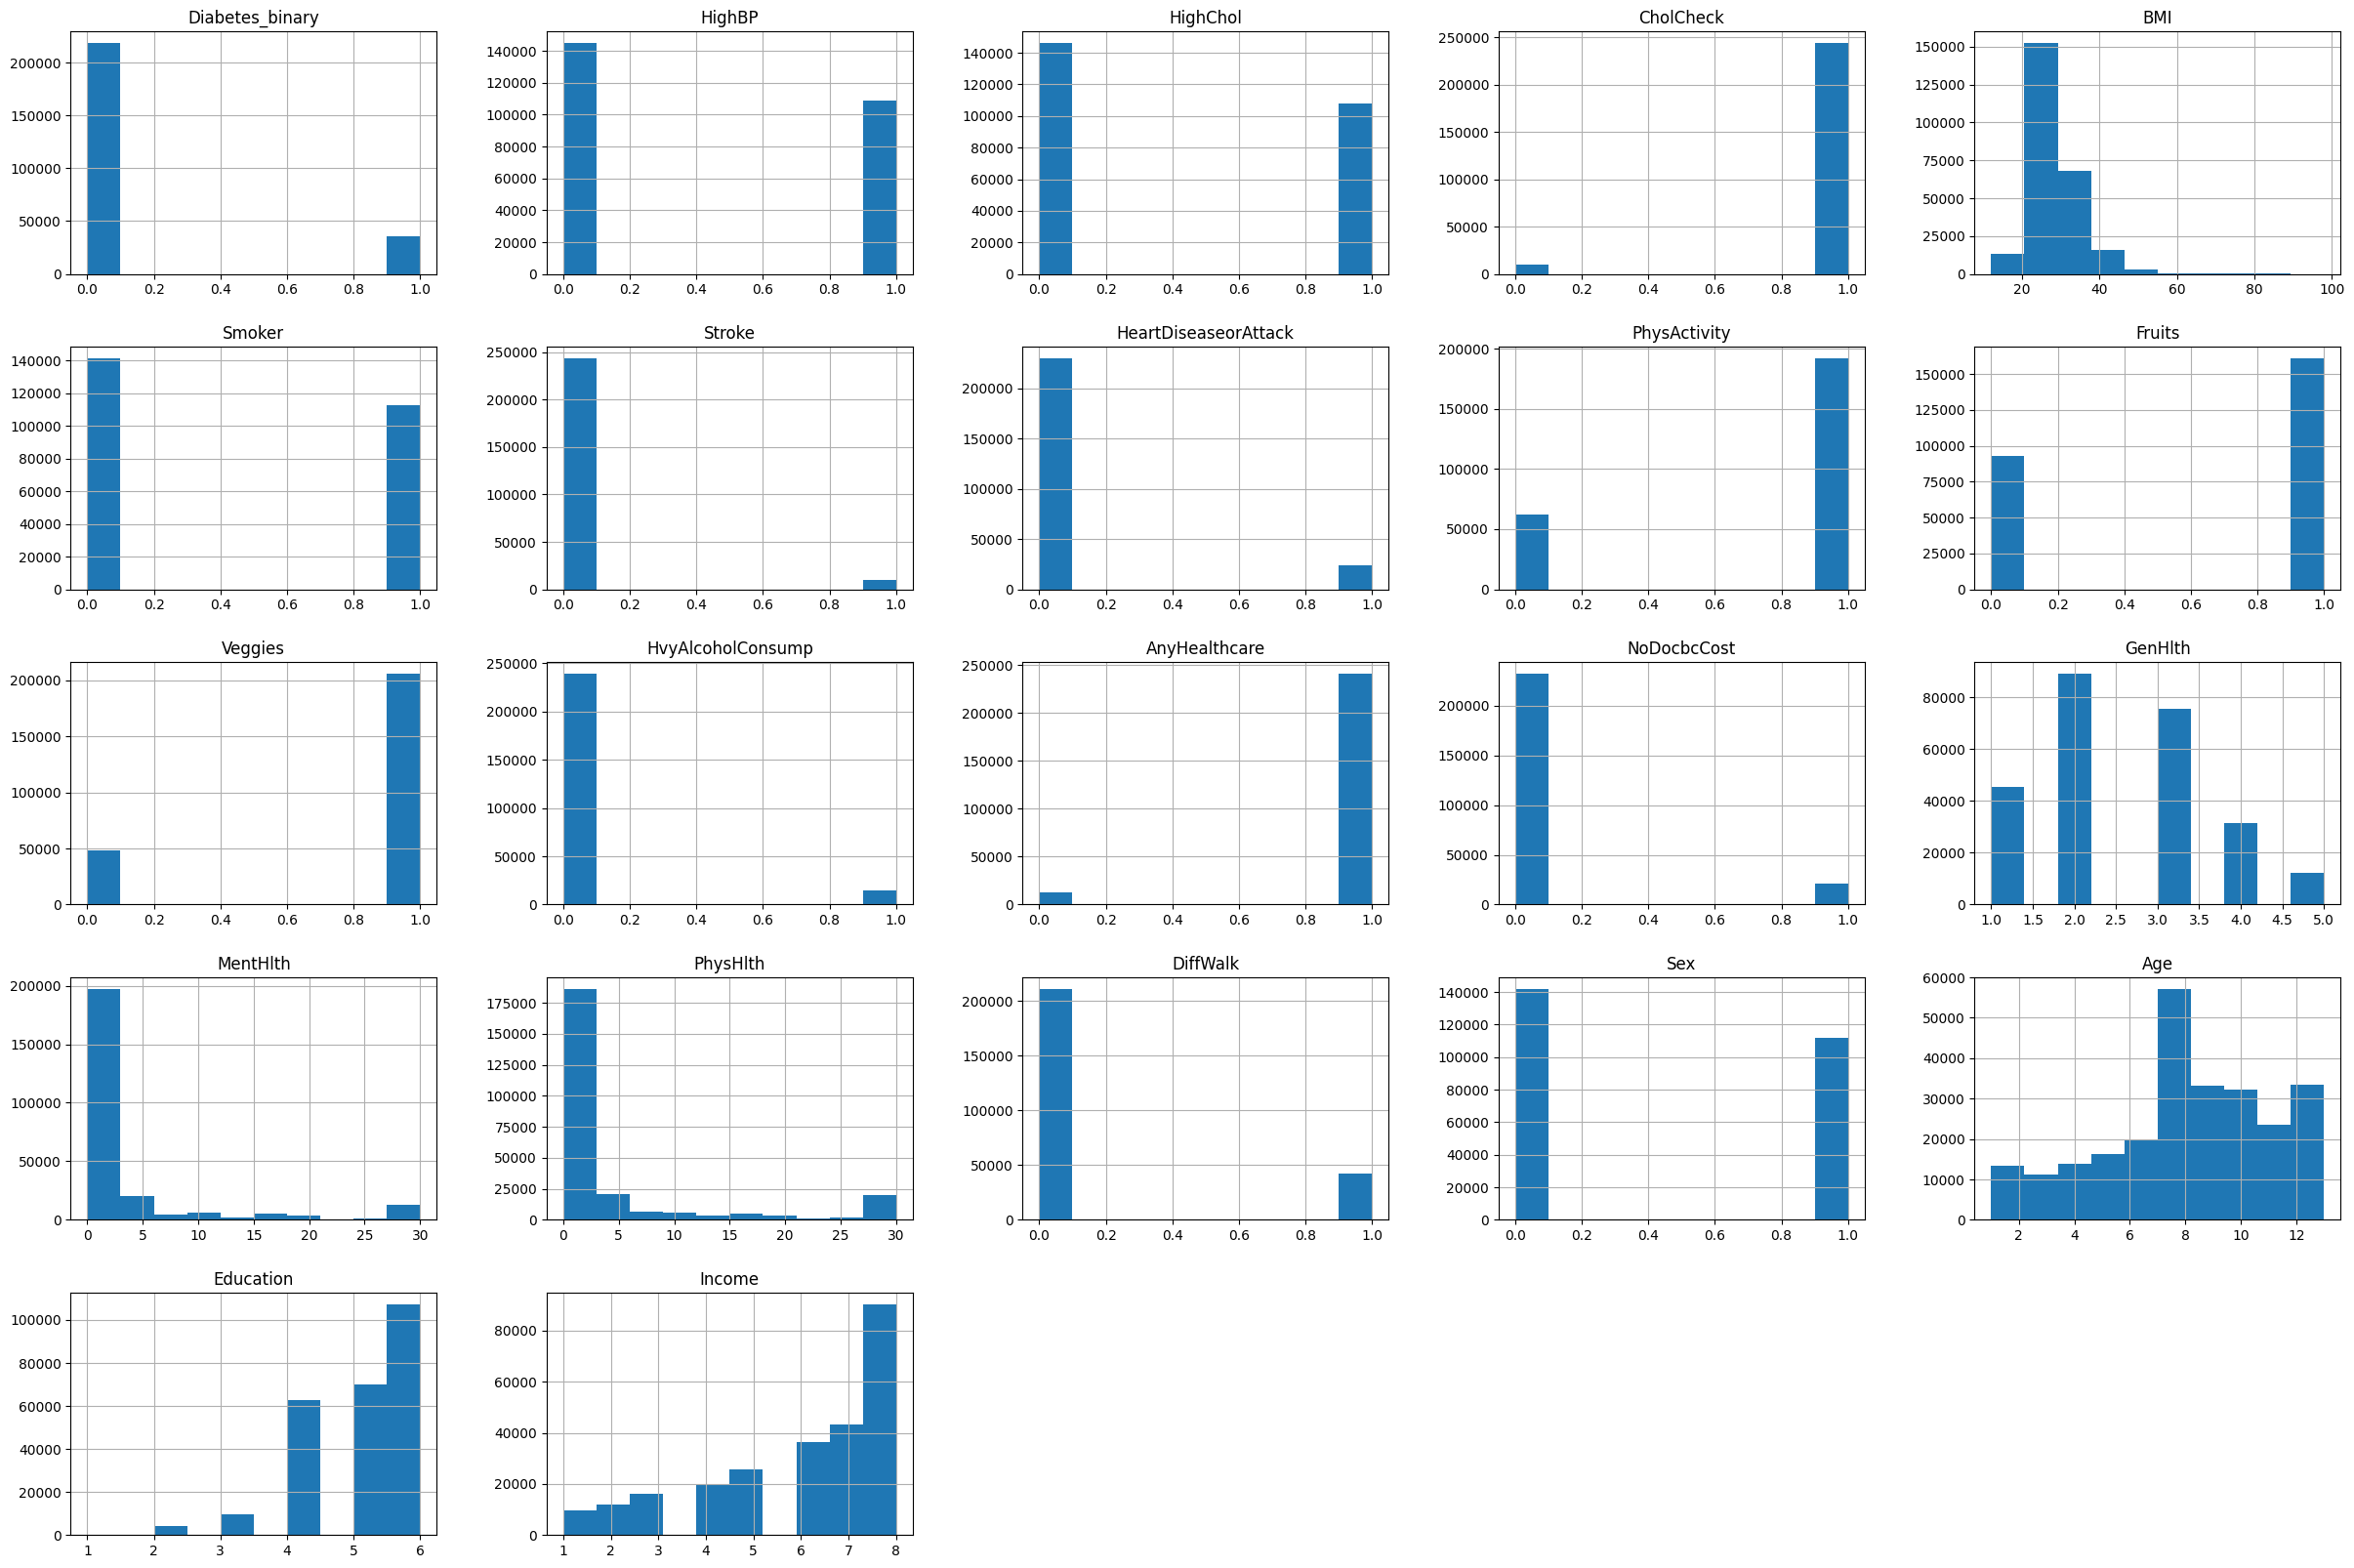

In [24]:
df.hist(figsize=(30,20));

In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 253680 entries, 0 to 253679
Series name: Diabetes_binary
Non-Null Count   Dtype
--------------   -----
253680 non-null  int64
dtypes: int64(1)
memory usage: 1.9 MB


In [25]:
y.head()

,Diabetes_binary
0,0
1,0
2,0
3,0
4,0


In [26]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature matrix and y is your target variable

# Split into training and the rest (70/30 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the remaining data into validation and test sets (2/1 split)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
# The Support Vector Classification (SVC) model with certain kernels,
# such as the Radial Basis Function (RBF) kernel,
# is a non-linear model.

# 7a. Implement RBF Kernel Functions
# Define the RBF model
model_rbf = SVC(kernel='rbf', random_state=42)

# 7b. Train the Model
# Fit the model on the training data
model_rbf.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = model_rbf.predict(X_val)

# Evaluate the model
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
# print("Validation Classification Report:")
# print(classification_report(y_val, y_val_pred))

# 7c. Tune Hyperparameters
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10, 100]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(kernel='rbf', random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model on the validation set
best_model_rbf = grid_search.best_estimator_
y_val_pred_best = best_model_rbf.predict(X_val)

print("Validation Accuracy with Best Model::", accuracy_score(y_val, y_val_pred_best))


Validation Accuracy: 0.7543
Best Parameters: {'C': 10, 'gamma': 1}
Best Score: 0.7812
Validation Accuracy with Best Model: 0.7923


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
print("Validation Performance:\n", classification_report(y_val, y_val_pred))

Validation Performance:
              precision    recall  f1-score   support

           0       0.81      0.76      0.79       43881
           1       0.76      0.81      0.78        7108

    accuracy                           0.79       50989
   macro avg       0.79      0.79      0.79       50989
weighted avg       0.79      0.79      0.79       50989


In [ ]:
# from sklearn.kernel_approximation import RBFSampler
# from sklearn.linear_model import SGDClassifier

# # Approximate RBF kernel using RBFSampler
# rbf_feature = RBFSampler(gamma=1, random_state=1, n_components=500)
# X_features = rbf_feature.fit_transform(X_sample)

# # Train a classifier on the new feature space
# sgd_model = SGDClassifier(max_iter=1000)
# sgd_model.fit(X_features, y_sample)

# # Transform test data using the same RBF sampler
# X_test_features = rbf_feature.transform(X_test)
# y_pred_sgd = sgd_model.predict(X_test_features)

# # Evaluate the model
# accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
# precision_sgd = precision_score(y_test, y_pred_sgd)
# recall_sgd = recall_score(y_test, y_pred_sgd)
# f1_sgd = f1_score(y_test, y_pred_sgd)

# print(f'SGD Model with RBF Features - Accuracy: {accuracy_sgd}, Precision: {precision_sgd}, Recall: {recall_sgd}, F1 Score: {f1_sgd}')


In [ ]:

# import numpy as np
# from sklearn.metrics.pairwise import rbf_kernel
# from scipy.optimize import minimize
# from sklearn.model_selection import cross_val_score

# def rbf_kernel(X, gamma):
#     """
#     Implements the RBF (Radial Basis Function) kernel.

#     Parameters:
#     X (numpy.ndarray): Input data.
#     gamma (float): Gamma parameter for the RBF kernel.

#     Returns:
#     numpy.ndarray: RBF kernel matrix.
#     """
#     pairwise_dists = np.sum(X**2, axis=1)[:, np.newaxis] + \
#                      np.sum(X**2, axis=1)[np.newaxis, :] - \
#                      2 * np.dot(X, X.T)
#     return np.exp(-gamma * pairwise_dists)

# def rbf_model(X, y, num_basis, gamma, lam):
#     """
#     Trains an RBF model on the given training data.

#     Parameters:
#     X (numpy.ndarray): Input data.
#     y (numpy.ndarray): Target variable.
#     num_basis (int): Number of RBF basis functions.
#     gamma (float): Gamma parameter for the RBF kernel.
#     lam (float): Regularization strength.

#     Returns:
#     numpy.ndarray: Learned weights for the RBF model.
#     """
#     n = X.shape[0]
#     centers = X[np.random.choice(n, num_basis, replace=False)]

#     def objective(w):
#         y_pred = np.dot(rbf_kernel(X, gamma), w)
#         return 0.5 * np.mean((y - y_pred)**2) + 0.5 * lam * np.sum(w**2)

#     initial_w = np.zeros(num_basis)
#     res = minimize(objective, initial_w, method='L-BFGS-B')
#     return res.x

# def tune_hyperparameters(X, y, num_basis_options, gamma_options, lambda_options):
#     best_score = -float('inf')
#     best_params = None

#     for num_basis in num_basis_options:
#         for gamma in gamma_options:
#             for lam in lambda_options:
#                 weights = rbf_model(X, y, num_basis, gamma, lam)
#                 score = cross_val_score(lambda X: np.dot(rbf_kernel(X, gamma), weights), X, y, cv=5, scoring='r2').mean()
#                 if score > best_score:
#                     best_score = score
#                     best_params = {'num_basis': num_basis, 'gamma': gamma, 'lambda': lam}

#     return best_params


# num_basis_options = [10, 20, 30]
# gamma_options = [0.1, 1.0, 10.0]
# lambda_options = [0.01, 0.1, 1.0]

# best_params = tune_hyperparameters(X_train, y_train, num_basis_options, gamma_options, lambda_options)
# print(f"Best hyperparameters: {best_params}")

In [ ]:

from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train Perceptron
model_perceptron = Perceptron(max_iter=1000, random_state=42)
model_perceptron.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_perceptron = model_perceptron.predict(X_val)

# Evaluate the Perceptron model
print("Perceptron Validation Accuracy:", accuracy_score(y_val, y_val_pred_perceptron))


Perceptron Validation Accuracy: 0.7375


In [ ]:
print("Perceptron Validation Performance:\n", classification_report(y_val, y_val_pred_perceptron))


Perceptron Validation Performance:
              precision    recall  f1-score   support

           0       0.74      0.75      0.75       43881
           1       0.75      0.74      0.75       7108

    accuracy                           0.75       50989
   macro avg       0.74      0.74      0.74       50989
weighted avg       0.74      0.74      0.74       50989


In [ ]:
from sklearn.neural_network import MLPClassifier

# Initialize the MLP model with specific architecture
model_mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)

# Train the model
model_mlp.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_mlp = model_mlp.predict(X_val)

# Evaluate the MLP model
print("MLP Validation Accuracy:", accuracy_score(y_val, y_val_pred_mlp))



MLP Validation Accuracy: 0.8125


In [ ]:
print("MLP Validation Performance:")
print(classification_report(y_val, y_val_pred_mlp))


MLP Validation Performance:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       43881
           1       0.83      0.78      0.80        7108

    accuracy                           0.81       50989
   macro avg       0.81      0.81      0.81       50989
weighted avg       0.81      0.81      0.81       50989


In [ ]:
# # Example with different activation functions and network structures
# model_mlp_experiment = MLPClassifier(
#     hidden_layer_sizes=(50, 50),
#     activation='tanh',
#     solver='adam',
#     learning_rate='adaptive',
#     max_iter=500,
#     random_state=42
# )

# # Train the experimental model
# model_mlp_experiment.fit(X_train, y_train)

# # Predict on the validation set
# y_val_pred_mlp_experiment = model_mlp_experiment.predict(X_val)

# # Evaluate the experimental MLP model
# print("Experimental MLP Validation Accuracy:", accuracy_score(y_val, y_val_pred_mlp_experiment))
# print("Experimental MLP Validation Classification Report:")
# print(classification_report(y_val, y_val_pred_mlp_experiment))

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid for hyperparameter tuning
# param_grid_mlp = {
#     'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
#     'activation': ['relu', 'tanh'],
#     'solver': ['adam', 'sgd'],
#     'learning_rate': ['constant', 'adaptive']
# }

# # Initialize GridSearchCV
# grid_search_mlp = GridSearchCV(MLPClassifier(max_iter=500, random_state=42), param_grid_mlp, cv=5, scoring='accuracy', n_jobs=-1)

# # Fit GridSearchCV to the training data
# grid_search_mlp.fit(X_train, y_train)

# # Best parameters and best score
# print("Best Parameters for MLP:", grid_search_mlp.best_params_)
# print("Best Score for MLP:", grid_search_mlp.best_score_)

# # Evaluate the best model on the validation set
# model_mlp = grid_search_mlp.best_estimator_
# y_val_pred_best_mlp = model_mlp.predict(X_val)

# print("Validation Accuracy with Best MLP Model:", accuracy_score(y_val, y_val_pred_best_mlp))
# #print("Validation Classification Report with Best MLP Model:")
# #print(classification_report(y_val, y_val_pred_best_mlp))


In [ ]:
# For RBF model
y_pred_rbf = best_model_rbf.predict(X_test)
print("RBF Test Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("RBF Test Classification Report:")
print(classification_report(y_test, y_pred_rbf))

# For Perceptron
y_pred_perceptron = model_perceptron.predict(X_test)
print("Perceptron Test Accuracy:", accuracy_score(y_test, y_pred_perceptron))
print("Perceptron Test Classification Report:")
print(classification_report(y_test, y_pred_perceptron))

# For MLP
y_pred_mlp = model_mlp.predict(X_test)
print("MLP Test Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("MLP Test Classification Report:")
print(classification_report(y_test, y_pred_mlp))


RBF Test Accuracy: 0.7921
RBF Test Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.76      0.79        43881
           1       0.76      0.81      0.78        7108

    accuracy                           0.79       50989
   macro avg       0.79      0.79      0.79       50989
weighted avg       0.79      0.79      0.79       50989

Perceptron Test Accuracy: 0.7482
Perceptron Test Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.74      0.75        43881
           1       0.74      0.75      0.75        7108

    accuracy                           0.75       50989
   macro avg       0.75      0.75      0.75       50989
weighted avg       0.75      0.75      0.75       50989

MLP Test Accuracy: 0.8125
MLP Test Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        43881
           1       0.83 

In [ ]:
# 10. Evaluate the performance of the nonlinear models on the test data
print("RBF Model:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rbf):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_rbf):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_rbf):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred_rbf):.2f}")

print("Perceptron:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_perceptron):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_perceptron):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_perceptron):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred_perceptron):.2f}")

print("MLP:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_mlp):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_mlp):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_mlp):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred_mlp):.2f}")



RBF Model:
Accuracy: 0.79
Precision: 0.81
Recall: 0.76
F1-score: 0.79

Perceptron:
Accuracy: 0.75
Precision: 0.75
Recall: 0.74
F1-score: 0.75

MLP:
Accuracy: 0.81
Precision: 0.80
Recall: 0.85
F1-score: 0.82


In [ ]:
# # b. Plot learning curves to analyze model convergence and overfitting
# plt.figure(figsize=(10, 6))
# plt.plot(range(1, len(best_model_rbf.loss_) + 1), best_model_rbf.loss_)
# plt.title('Learning Curve for RBF Model')
# plt.xlabel('Iteration')
# plt.ylabel('Loss')
# plt.show()

# plt.figure(figsize=(10, 6))
# plt.plot(range(1, len(model_perceptron.loss_iter_) + 1), model_perceptron.loss_iter_)
# plt.title('Learning Curve for Perceptron')
# plt.xlabel('Iteration')
# plt.ylabel('Loss')
# plt.show()

# plt.figure(figsize=(10, 6))
# plt.plot(range(1, len(model_perceptron.loss_curve_) + 1), model_perceptron.loss_curve_)
# plt.title('Learning Curve for MLP')
# plt.xlabel('Iteration')
# plt.ylabel('Loss')
# plt.show()

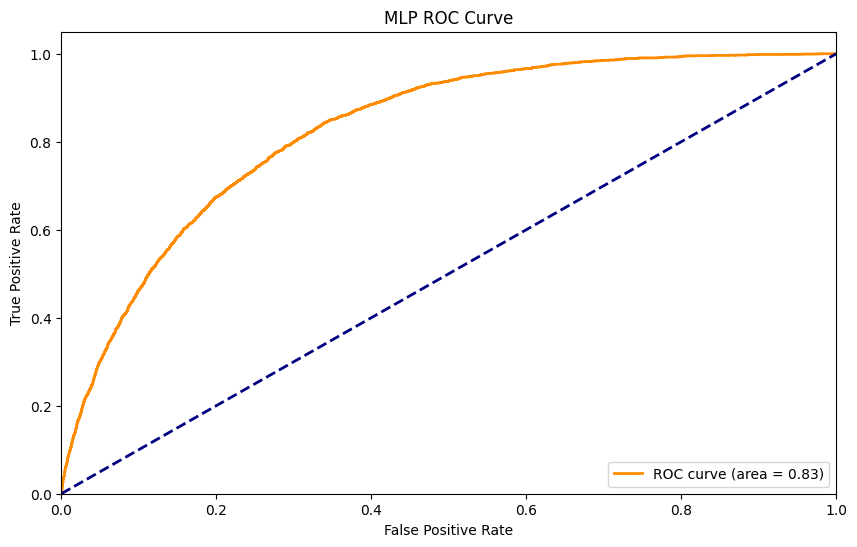

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, model_mlp.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("MLP ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Repeat similar plots for RBF SVM and Perceptron if desired

### Performance Comparison of Models

**Overview:**
The evaluation of the RBF, Perceptron, and MLP models reveals distinct differences in their performance metrics on the test dataset. Here’s an analysis based on overall trends rather than specific values.

**RBF Model:**
- This model demonstrates a balanced performance with commendable precision and recall for both classes.
- It effectively identifies class 1, achieving a relatively high recall, indicating strong sensitivity to this class, though with slightly lower precision.
- The overall accuracy suggests it is proficient in distinguishing between the two classes.

**Perceptron:**
- The Perceptron shows a moderate performance, falling short compared to the RBF.
- While it maintains similar precision levels for both classes, the recall indicates it struggles more with class 0, reflecting lower sensitivity.
- Overall accuracy is decent, but it lags behind the other models, revealing it may not be the best choice for this classification task.

**MLP Model:**
- The MLP stands out as the top performer among the three models.
- It achieves a better balance of precision and recall for both classes, indicating that it can effectively identify instances from both classes without significant misclassification.
- The overall accuracy is the highest, showcasing its ability to generalize well on unseen data.

**Conclusion:**
- In summary, while the RBF and MLP models show robust performance, the MLP edges out slightly due to superior metrics across the board.
- The Perceptron, although adequate, may require further tuning or a different architecture to compete effectively with the other two models.
- For practical applications, the MLP would likely be the preferred choice, especially in scenarios where accurate classification is critical.

# 11. Compare your previous lab results with nonlinear model results

Compare Performance:

Accuracy: Compare the accuracy of each nonlinear model to the linear models. For instance, if the MLP achieved an better % accuracy, it mayoutperform the previous models.

Precision, Recall, F1-Score: Analyze these metrics to understand how well the models perform in terms of detecting positive cases andhandling imbalanced classes.


Strengths and Weaknesses:

RBF Kernel: Often performs well on data where classes are not linearly separable. If it outperforms linear models, it suggests the data may havecomplex patterns.

Perceptron: As a simple linear model, it might not perform as well if the data is complex.

MLP: Usually offers better performance with more complex datasets due to its ability to learn nonlinear relationships. If the MLP showssuperior performance, it suggests it effectively captured the underlying patterns.

Overfitting and Generalization:
Use learning curves and other diagnostics to see if models are overfitting


The linear regression model from the previous lab faced notable challenges, as indicated by the scattered predictions that frequently diverged from actual values, revealing its difficulty in capturing the dataset's complexity. In contrast, the Multi-Layer Perceptron (MLP), a nonlinear model utilized in the current lab, exhibited enhanced performance, evidenced by a robust ROC curve with a good AUC. This shows that nonlinear models like MLP are more effective for handling complex datasets, delivering more accurate and dependable results compared to linear regression.